In [11]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

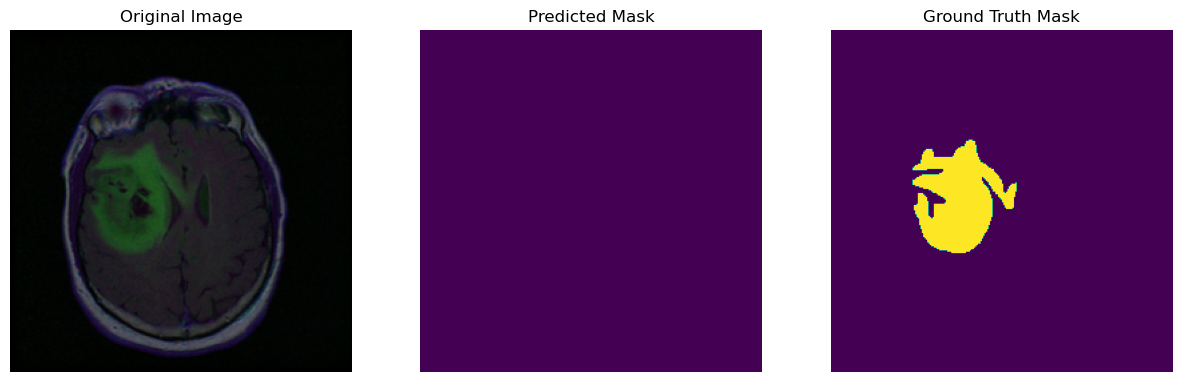

In [16]:


# Load pre-trained U-Net model
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

# Define transformations for input images
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the original image and its ground truth mask
original_image = Image.open('../data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_39.tif')
ground_truth_mask = Image.open('../data/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_39_mask.tif')

# Apply transformations to the original image
input_tensor = transform(original_image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0]

# Convert output tensor to numpy array
predicted_mask = output.argmax(0).cpu().numpy()

# Convert ground truth mask to numpy array
ground_truth_mask = np.array(ground_truth_mask)

# Calculate Intersection over Union (IoU)
#iou = jaccard_score(ground_truth_mask.flatten(), predicted_mask.flatten())

# Visualize the metrics
#print(f"IoU: {iou}")

# Visualize original image, predicted mask, and ground truth mask side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Predicted mask
axes[1].imshow(predicted_mask)
axes[1].set_title('Predicted Mask')
axes[1].axis('off')

# Ground truth mask
axes[2].imshow(ground_truth_mask)
axes[2].set_title('Ground Truth Mask')
axes[2].axis('off')

plt.show()


In [17]:
model = torch.load('dinov2_vits14_ade20k_linear_head.pth')

In [19]:
with torch.no_grad():
    output = model(input_tensor)['out'][0]

TypeError: 'dict' object is not callable

In [20]:
model

{'meta': {'mmseg_version': '0.27.0+',
  'config': '',
  'CLASSES': ('wall',
   'building',
   'sky',
   'floor',
   'tree',
   'ceiling',
   'road',
   'bed ',
   'windowpane',
   'grass',
   'cabinet',
   'sidewalk',
   'person',
   'earth',
   'door',
   'table',
   'mountain',
   'plant',
   'curtain',
   'chair',
   'car',
   'water',
   'painting',
   'sofa',
   'shelf',
   'house',
   'sea',
   'mirror',
   'rug',
   'field',
   'armchair',
   'seat',
   'fence',
   'desk',
   'rock',
   'wardrobe',
   'lamp',
   'bathtub',
   'railing',
   'cushion',
   'base',
   'box',
   'column',
   'signboard',
   'chest of drawers',
   'counter',
   'sand',
   'sink',
   'skyscraper',
   'fireplace',
   'refrigerator',
   'grandstand',
   'path',
   'stairs',
   'runway',
   'case',
   'pool table',
   'pillow',
   'screen door',
   'stairway',
   'river',
   'bridge',
   'bookcase',
   'blind',
   'coffee table',
   'toilet',
   'flower',
   'book',
   'hill',
   'bench',
   'countertop',

In [22]:
BACKBONE_SIZE = "small" # in ("small", "base", "large" or "giant")


backbone_archs = {
    "small": "vits14",
    "base": "vitb14",
    "large": "vitl14",
    "giant": "vitg14",
}
backbone_arch = backbone_archs[BACKBONE_SIZE]
backbone_name = f"dinov2_{backbone_arch}"

backbone_model = torch.hub.load(repo_or_dir="facebookresearch/dinov2", model=backbone_name)
backbone_model.eval()
backbone_model.cuda()

Using cache found in C:\Users\Csabi/.cache\torch\hub\facebookresearch_dinov2_main
C:\Users\Csabi/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
C:\Users\Csabi/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
C:\Users\Csabi/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

In [24]:
%pip install mmcv

     ---------------------------------------- 0.0/471.4 kB ? eta -:--:--
      --------------------------------------- 10.2/471.4 kB ? eta -:--:--
     -- ---------------------------------- 30.7/471.4 kB 325.1 kB/s eta 0:00:02
     ---------------------- --------------- 276.5/471.4 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 471.4/471.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      C:\Users\Csabi\AppData\Local\Temp\pip-install-v4kjwta_\mmcv_8e34943a16dd4076a39ed7247bc58d48\setup.py:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import DistributionNotFound, get_distribution, parse_version
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Csabi\AppData\Local\Temp\pip-install-v4kjwta_\mmcv_8e34943a16dd4076a39ed7247bc58d48\setup.py", line 477, in <module>
          ext_modules=get_extensions(),
                      ^^^^^^^^^^^^^^^^
        File "C:\Users\Csabi\AppData\Local\Temp\pip-install-v4kjwta_\mmcv_8e34943a16dd4076a39ed7247bc58d48\setup.py", line 434, in get_extensions
          ext_ops = extension(

In [25]:
import os
print(os.environ.get('CUDA_PATH'))

None


In [23]:
import urllib

import mmcv
from mmcv.runner import load_checkpoint


def load_config_from_url(url: str) -> str:
    with urllib.request.urlopen(url) as f:
        return f.read().decode()


HEAD_SCALE_COUNT = 3 # more scales: slower but better results, in (1,2,3,4,5)
HEAD_DATASET = "voc2012" # in ("ade20k", "voc2012")
HEAD_TYPE = "ms" # in ("ms, "linear")


DINOV2_BASE_URL = "https://dl.fbaipublicfiles.com/dinov2"
head_config_url = f"{DINOV2_BASE_URL}/{backbone_name}/{backbone_name}_{HEAD_DATASET}_{HEAD_TYPE}_config.py"
head_checkpoint_url = f"{DINOV2_BASE_URL}/{backbone_name}/{backbone_name}_{HEAD_DATASET}_{HEAD_TYPE}_head.pth"

cfg_str = load_config_from_url(head_config_url)
cfg = mmcv.Config.fromstring(cfg_str, file_format=".py")
if HEAD_TYPE == "ms":
    cfg.data.test.pipeline[1]["img_ratios"] = cfg.data.test.pipeline[1]["img_ratios"][:HEAD_SCALE_COUNT]
    print("scales:", cfg.data.test.pipeline[1]["img_ratios"])

model = create_segmenter(cfg, backbone_model=backbone_model)
load_checkpoint(model, head_checkpoint_url, map_location="cpu")
model.cuda()
model.eval()

ModuleNotFoundError: No module named 'mmcv'